In [1]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

datafile = os.path.expanduser('/home/dave/projects/diploma/maps/data/API_IT.NET.USER.ZS_DS2_en_csv_v2_10082442.csv')
shapefile = os.path.expanduser('/home/dave/projects/diploma/maps/data/ne_10m_admin_0_countries_lakes.shp')
print(shapefile)
colors = 9
cmap = 'Blues'
figsize = (16, 10)
year = '2016'
cols = ['Country Name', 'Country Code', year]
title = 'Individuals using the Internet (% of population) in {}'.format(year)
imgfile = 'img/{}.png'.format((title)) #here was slug

description = '''
Individuals who have used the Internet from any location in the last 3 months via any device based on the International Telecommunication Union,
World Telecommunication/ICT Development Report and database. Data: World Bank - worldbank.org • Author: Ramiro Gómez - ramiro.org'''.strip()

gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
gdf.sample(5)


/home/dave/projects/diploma/maps/ne_10m_admin_0_countries_lakes.shp


,ADM0_A3,geometry
252,BJN,POLYGON ((-7473161.812011496 1689299.321985099...
101,BEN,"POLYGON ((337689.30614198 1250885.400098011, 3..."
39,SXM,POLYGON ((-5875110.733005072 1931775.698353881...
123,SWZ,POLYGON ((2930501.055415542 -2776260.992362202...
136,ECU,(POLYGON ((-7446457.988351152 153402.447328224...


In [2]:
df = pd.read_csv(datafile, skiprows=4, usecols=cols)
df.sample(5)

,Country Name,Country Code,2016
190,Puerto Rico,PRI,80.320000
24,Belize,BLZ,44.575740
67,Eritrea,ERI,1.177119
212,Serbia,SRB,67.056841
36,Channel Islands,CHI,NaN


In [3]:
merged = gdf.merge(df, left_on='ADM0_A3', right_on='Country Code')
merged.describe()

,2016
count,201.000000
mean,51.524254
std,28.606108
min,1.177119
25%,25.366301
50%,54.000000
75%,76.176737
max,98.240016


/home/dave/anaconda3/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


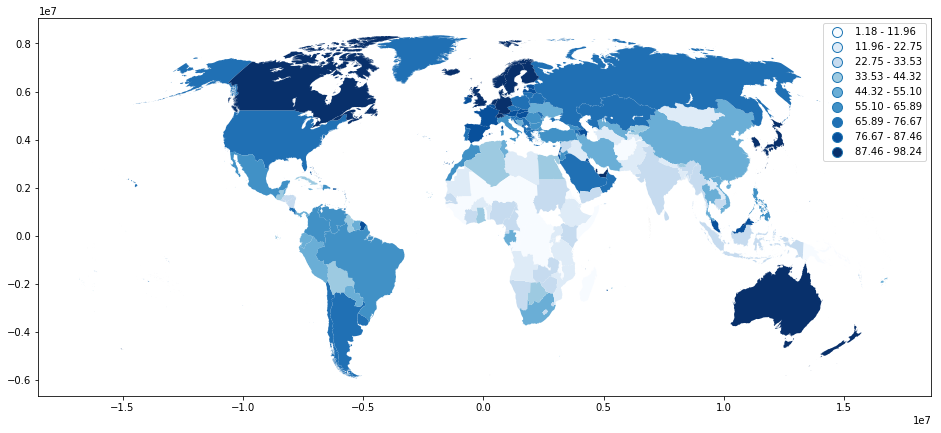

In [4]:
ax = merged.dropna().plot(column=year, cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)

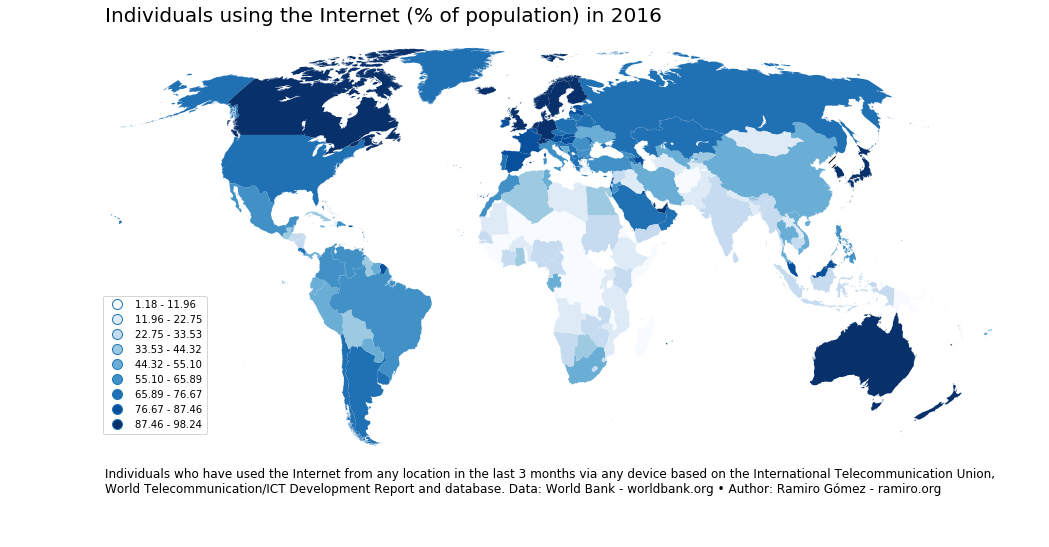

<Figure size 432x288 with 0 Axes>

In [5]:
merged[merged.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')

ax.set_title(title, fontdict={'fontsize': 20}, loc='left')
ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.get_figure()

AttributeError: 'AxesSubplot' object has no attribute 'show'